In [1]:

# Import all modules
from common import concatenate_features, extract_features, load_audio
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from time import time

In [2]:
# How to use load_audio() function
wav_files = list(map(lambda f: 'wavs/' + f, os.listdir('wavs/')))
male_voices, female_voices = load_audio(wav_files)

# Use the extract_features() function
male_features = extract_features(male_voices)
female_features = extract_features(female_voices)

# How the function is used
male_concatenated = concatenate_features(male_features)
female_concatenated = concatenate_features(female_features)

print(male_concatenated.shape) 		# Output: (117576, 26)
print(female_concatenated.shape)	# Output: (124755, 26)

100%|██████████| 300/300 [00:00<00:00, 687.79it/s] 

(117667, 26)
(124815, 26)


In [3]:

# Concatenate male voices and female voices
X = np.vstack((male_concatenated, female_concatenated))

# Create labels
y = np.append([0] * len(male_concatenated), [1] * len(female_concatenated))

# Check whether X and y are already having the exact same length
print(X.shape)		# Output: (242268, 26)
print(y.shape)		# Output: (242268,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

(242482, 26)
(242482,)


In [4]:
# Initialize SVM model
clf = SVC(kernel='rbf')       # Try to run with LogisticRegression(). Don't forget to import this in advance

# Train the model
start = time()
clf.fit(X_train[:50000], y_train[:50000])
print(time()-start)						# Output: 184.8018662929535 (seconds)

# Compute the accuracy score towards train data
start = time()
print(clf.score(X_train[:50000], y_train[:50000]))		# Output: 0.78204
print(time()-start)						# Output: 90.8693311214447 (seconds)

# Compute the accuracy score towards test data
start = time()
print(clf.score(X_test[:10000], y_test[:10000]))		# Output: 0.7679
print(time()-start)						# Output: 18.082067728042603 (seconds)

51.41308617591858
0.79514
98.96835398674011
0.7727
19.696269035339355


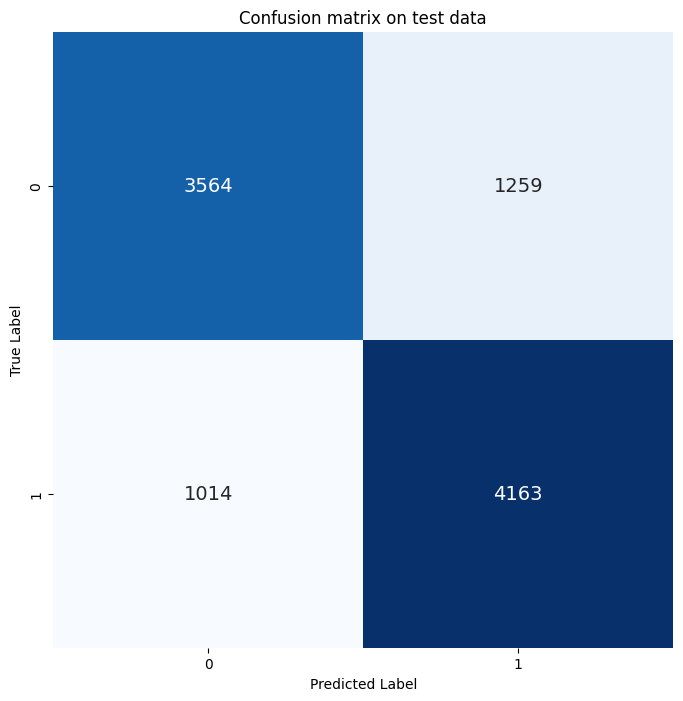

In [5]:
# Predict the first 10000 test data
svm_predictions = clf.predict(X_test[:10000])

# Create the confusion matrix values
cm = confusion_matrix(y_test[:10000], svm_predictions)

# Create the confusion matrix display
plt.figure(figsize=(8,8))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', 
            cmap=plt.cm.Blues, cbar=False, annot_kws={'size':14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

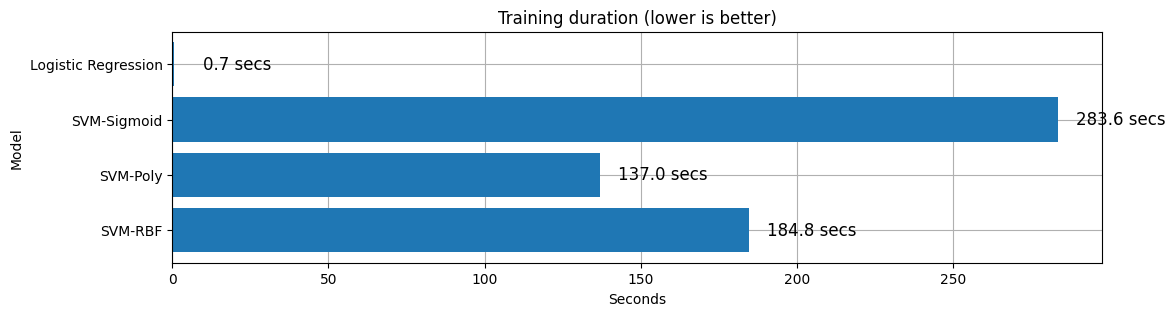

In [6]:
# Performance comparison between different algorithms
index = ['SVM-RBF', 'SVM-Poly', 'SVM-Sigmoid', 'Logistic Regression']

# I record all the results below manually
values = [184.8, 137.0, 283.6, 0.7]

plt.figure(figsize=(12,3))
plt.title('Training duration (lower is better)')
plt.xlabel('Seconds')
plt.ylabel('Model')
plt.barh(index, values, zorder=2)
plt.grid(zorder=0)

for i, value in enumerate(values):
    plt.text(value+20, i, str(value)+' secs', fontsize=12, color='black',
             horizontalalignment='center', verticalalignment='center')

plt.show()

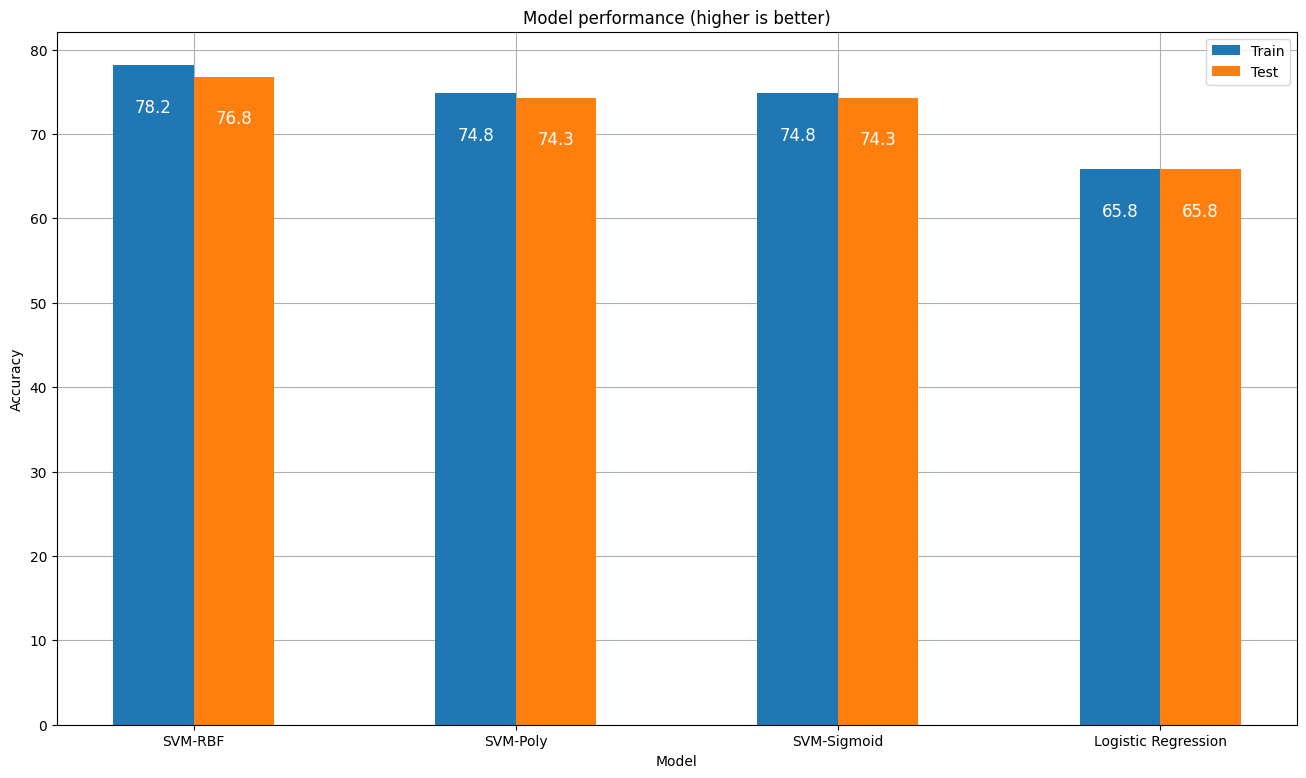

In [7]:
# set width of bar
barWidth = 0.25
    
index = ['SVM-RBF', 'SVM-Poly', 'SVM-Sigmoid', 'Logistic Regression']

# set height of bar
# I record all the results below manually
train_acc = [78.2, 74.8, 74.8, 65.8]
test_acc = [76.8, 74.3, 74.3, 65.8]
 
# Set position of bar on X axis
baseline = np.arange(len(train_acc))
r1 = [x + 0.125 for x in baseline]
r2 = [x + 0.25 for x in r1]
 
# Make the plot
plt.figure(figsize=(16,9))
plt.title('Model performance (higher is better)')
plt.bar(r1, train_acc, width=barWidth, label='Train', zorder=2)
plt.bar(r2, test_acc, width=barWidth, label='Test', zorder=2)
plt.grid(zorder=0)
 
# Add xticks on the middle of the group bars
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks([r + barWidth for r in range(len(train_acc))], index)

# Create text
for i, value in enumerate(train_acc):
    plt.text(i+0.125, value-5, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
    
for i, value in enumerate(test_acc):
    plt.text(i+0.375, value-5, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
    
plt.legend()
plt.show()